## Observations and Insights 

In [ ]:
#1. Seems that there is a strong correlation between weight of the mouse and the Tumor Size

#2. According to the pie chart, the gender was almost perfectly split 50/50 between male and female which would be beneficial
#when looking at wether a drug would be gender biased.

#3. The line graph shows Capomulin to achieve a reduction in tumor size. However shortly after each injection the tumor achieves
#growth again.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#data_df=mouse_metadata.append(study_results)

data_df=pd.merge(mouse_metadata,study_results, how='left', on="Mouse ID")
data_df

new_data_df=data_df.loc[:, ["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)","Timepoint","Tumor Volume (mm3)","Metastatic Sites"]]


#new_data_df.drop_duplicates()
# Checking the number of mice in the DataFrame.

#data_df["Mouse ID"].nunique()
#new_data_df=data_df.drop_duplicates(subset=None, keep="first", inplace=False)
#new_data_df
#data_df.count()
#data_df["Mouse ID"].nunique()

new_data_df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates=data_df["Mouse ID"].duplicated()
#data_df.duplicated(self, subset: Union[Hashable, Sequence[Hashable], NoneType] = None, keep: Union[str, bool] = 'first')
data_df.duplicated(subset=["Mouse ID","Timepoint"])

#duplicates=pd.DataFrame(data_df, columns=["Mouse ID","Timepoint"])
#duplicates=data_df[data_df.duplicated()]

#duplicates
#duplicates.duplicated()
#data_df.groupby("Timepoint","Mouse ID").duplicated
dup_df=data_df[data_df[["Mouse ID","Timepoint"]].duplicated() == True]
dup_df
#dup_df.duplicated([["Mouse ID","Timepoint"]], keep:True)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=new_data_df.drop_duplicates()
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
total_mice=clean_data["Mouse ID"].unique()


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen
tumor_vol_mean=clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_vol_median=clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_variance=clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_vol_sd=clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_vol_sem=clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_vol_sem
# This method is the most straighforward, creating multiple series and putting them all together at the end.


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen


regimen_table=pd.DataFrame({"Tumor mean":tumor_vol_mean,
                           "Tumor median":tumor_vol_median,
                           "Tumor variance":tumor_vol_variance,
                           "Tumor standard Dev":tumor_vol_sd,
                           "Tumor sem":tumor_vol_sem})
regimen_table

,Tumor mean,Tumor median,Tumor variance,Tumor standard Dev,Tumor sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

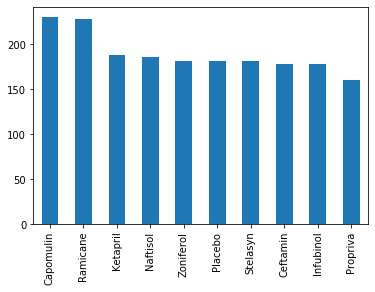

In [8]:
# Generate a bar plot showing the number of mice per time point 
#for each treatment throughout the course of the study using pandas.
mice_per_point=clean_data["Drug Regimen"].value_counts()
mice_per_point

mice_per_point.plot(kind="bar")
#xlabels and y label


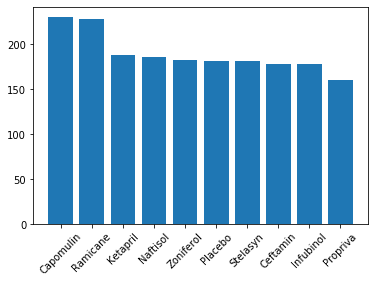

In [9]:
# Generate a bar plot showing the number of mice per time point for 
#each treatment throughout the course of the study using pyplot.

plt.bar(mice_per_point.index.values,mice_per_point.values)
plt.xticks(rotation=45)
plt.show()
#add labels

## Pie Plots

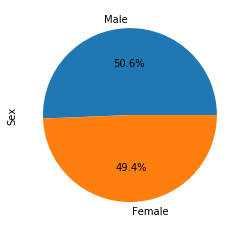

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex=clean_data["Sex"].value_counts()
mice_sex.plot(kind="pie",autopct="%1.1f%%")
plt.show()



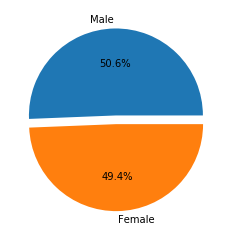

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0,0.1)
plt.pie(mice_sex.values,explode=explode,labels=mice_sex.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most
#promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_valu=clean_data.groupby(["Mouse ID"]).max()
max_valu
max_valu=max_valu.reset_index()
fin_df=max_valu[["Mouse ID","Timepoint"]].merge(clean_data, on=["Mouse ID","Timepoint"], how="left")
fin_df
ceftamin=fin_df.loc[fin_df["Drug Regimen"]=="Ceftamin"]
ceftamin_vol=ceftamin["Tumor Volume (mm3)"]

Ramicane=fin_df.loc[fin_df["Drug Regimen"]=="Ramicane"]
Ramicane_vol=Ramicane["Tumor Volume (mm3)"]

Capomulin=fin_df.loc[fin_df["Drug Regimen"]=="Capomulin"]
Capomulin_vol=Capomulin["Tumor Volume (mm3)"]

Naftisol=fin_df.loc[fin_df["Drug Regimen"]=="Naftisol"]
Naftisol_vol=Naftisol["Tumor Volume (mm3)"]

#regimen_vol_df=pd.DataFrame(["Ramicane Vol":Ramicane_vol])

#finish the plots Day 3 act 2 
#Ceftamin
quartiles1 = ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of final tumor volume is: {lowerq}")
#print(f"The upper quartile of final tumor volume is: {upperq}")
#print(f"The interquartile range of final tumor volume is: {iqr}")
#print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
#Ramicane
quartiles2 = Ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles2[0.25]
upperq = quartiles2[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of final tumor volume is: {lowerq}")
#print(f"The upper quartile of final tumor volume is: {upperq}")
#print(f"The interquartile range of final tumor volume is: {iqr}")
#print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
#Capomulin
quartiles3 = Capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles3[0.25]
upperq = quartiles3[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of final tumor volume is: {lowerq}")
#print(f"The upper quartile of final tumor volume is: {upperq}")
#print(f"The interquartile range of final tumor volume is: {iqr}")
#print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
#Naftisol
quartiles4 = Naftisol_vol.quantile([.25,.5,.75])
lowerq = quartiles4[0.25]
upperq = quartiles4[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of final tumor volume is: {lowerq}")
#print(f"The upper quartile of final tumor volume is: {upperq}")
#print(f"The interquartile range of final tumor volume is: {iqr}")
#print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

quartiles=[quartiles1,quartiles2,quartiles3,quartiles4]

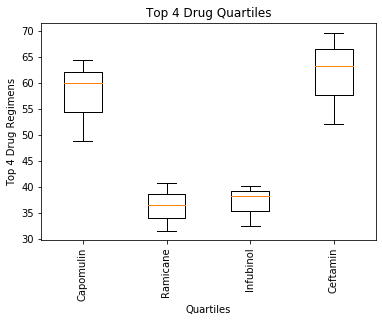

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]

#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()
fig1, ax1 = plt.subplots()
ax1.boxplot([quartiles1, quartiles2, quartiles3, quartiles4])
#xticks =['Capomulin','Ramicane','Infubinol','Ceftamin']
#plt.xticks(ticks=quartiles,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],rotation="45")
plt.xticks(ticks=(1,2,3,4), labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],rotation="90")
plt.xlabel('Quartiles')
plt.ylabel('Top 4 Drug Regimens')
plt.title('Top 4 Drug Quartiles')
plt.show()

## Line and Scatter Plots

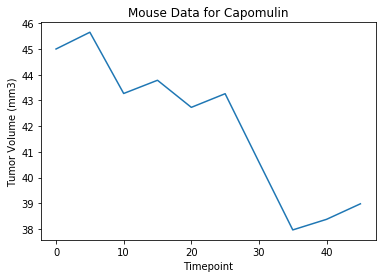

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#new_data_df=data_df.loc[:, ["Mouse ID","Drug Regimen","Sex",]]
drug_filter=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]

mouse=drug_filter.loc[drug_filter["Mouse ID"]=="b128"]
#plt.plot(x_axis, scaley=True, data=None, **kwargs)


plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Data for Capomulin')
plt.show()

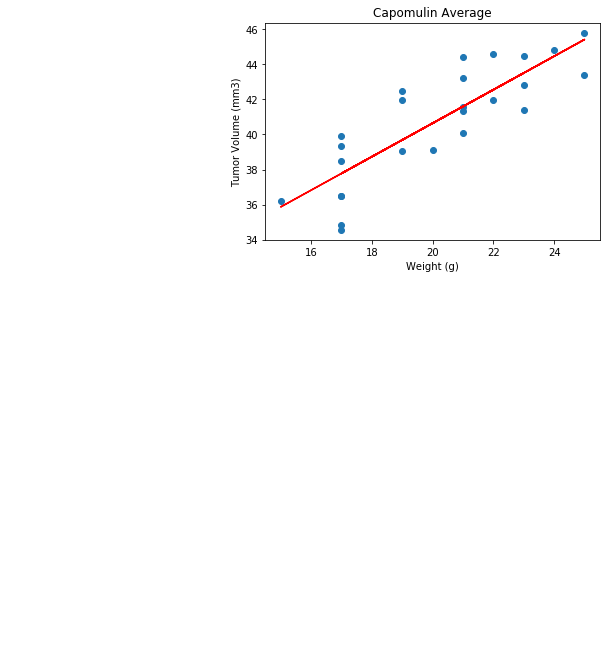

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#plt.scatter
#.loc["Capomulin"]
#groupby.mouse id
#average
#use this df for scatter plot weight and tumor vol columns
#pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None,
             #  verts=<deprecated parameter>, 
            #   edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)



drug_filter=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"]
cap_avg=drug_filter.groupby(["Mouse ID"]).mean()
y_values=cap_avg["Tumor Volume (mm3)"]
x_values=cap_avg["Weight (g)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"],marker="o")
#plt.scatter(cap_avg["Tumor Volume (mm3)"],cap_avg["Weight (g)"] ,marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Average')
plt.show()

## Correlation and Regression

The correlation coefficient between avg_tumor_vol and Mouse Weight is 0.84


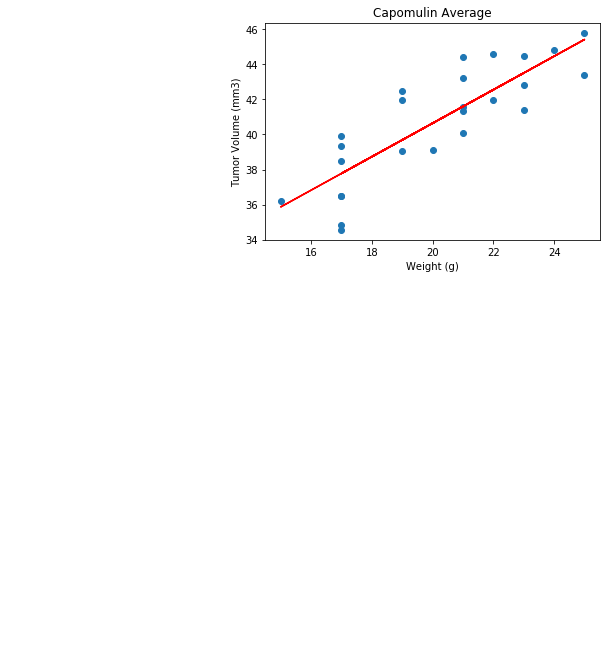

In [24]:
#day 3 act use the code
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#use above df
weight=cap_avg["Weight (g)"]
avg_tumor_vol=cap_avg["Tumor Volume (mm3)"]
print(f"The correlation coefficient between avg_tumor_vol and Mouse Weight is {round(st.pearsonr(weight,avg_tumor_vol )[0],2)}")


#plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"],marker="o")
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.title('Capomulin Average')
#plt.show()


plt.scatter(cap_avg["Weight (g)"],cap_avg["Tumor Volume (mm3)"],marker="o")
#plt.scatter(cap_avg["Tumor Volume (mm3)"],cap_avg["Weight (g)"] ,marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Average')
plt.show()